# CS 410: Text Information Systems

## Final Project - Progress Report <br/> Project Type: Classification Competition <br/>Team: The Classifiers <br/> November 27, 2020

### Praveen Pathri (ppathri2@illinois.edu) <br/>  Steven Piquito (piquito2@illinois.edu) <br/>  Mattias Rumpf (mrumpf2@illinois.eu)

### References and web-sites used in this code extensively:
    
https://towardsdatascience.com/sarcasm-detection-step-towards-sentiment-analysis-84cb013bb6db <br/>
https://simpletransformers.ai/docs/usage/

### Key Libraries Used in this Project to Date:

As part of our project certain libraries are being used extensively. 

For the core traditional ML models as well as feature vector transformations:

#### SKLearn Library<br/>

For the implementation of the RoBERTa pre-trained neural network architecture, the following libaries are used:

#### HuggingFace Transformer Library<br/>
#### SimpleTransformer.ai Library



### Description of Work To Date:

To start our project off, we first performed research into the various machine learning model types that existing literature appeared to favour when it came to binary classification tasks such as SARCASM or NOT SARCASM detection. Post this review, we decided to focus our investigation to a limited set of models which included a range of descriminitive, generative as well as neural network based options in order to cover a spectrum of the different types. </br>

For this, we implemented four models using the SKLearn library being Linear Support Vector Machine, Gussian Naive Bayes, Logistic Regression and Random Forest models. As inputs/feature vectors to these models, we utilised TFIDF non-linear transformation on the training dataset from which our vocabulary was derived. Some cleaning of the source text data was performed, however this was not the focus of our project at the progress report stage (this will likely be investigated under the next stops of the project to improve model performance).</br>

To compliment the traditional ML models we used from SKLearn, we investigated and also implemented a first attempt at a BERT/RoBERTa model using transfer learning. </br>

It should also be noted that, for the above models, we have only used the target tweet text as a model input. We have purposely left the inclusion of the context data towards the later part of our project in order to compare and contrast model performance at this interim step. </br>

The intention is to use the performance metrics observed in our results below as a base line against which further feature engineering, model changes and the incorporation of context data will be measured.</br>

In the code below we develop the baseline ML models out of the SKLearn library to test and compare to the target BERT model that will be fully investigated as part of the project. </br>

Models considered are:</br>

1. Learn SVM
2. Naive Bayes
3. Logistic Regression
4. Random Forest
5. RoBERTa



### Progress Made - Results So Far

As we show in the charts below, RoBERTa, without context, pre-processing, or hypterparameter tuning, considerably outperforms the base line models.</br>

Please note that the model performance measures shown in the graphs below are based currently on a split of the provided training dataset only and are not reflective of the project test set results (which may certainly differ).</br>

When measuring accuracy of predictions, the clear preferred model of the five implemented shows that RoBERTa appears to take clearly take the lead relative to the other discriminative/generative models. Certain literature sources research suggest that this may be due to the model's pre-learning of general language and syntactical structure on a large data source and stored in the neural network model structure. This however is still an area of research with no definitive answers as yet.</br>

Out of the remaining models, Linear SVM appears to be the preferred traditional model relative to its peer models in the SKLearn library. This again is consistent with the observations found in our research on the topic (i.e. LSVM appears to be the strongest discriminative model).</br>

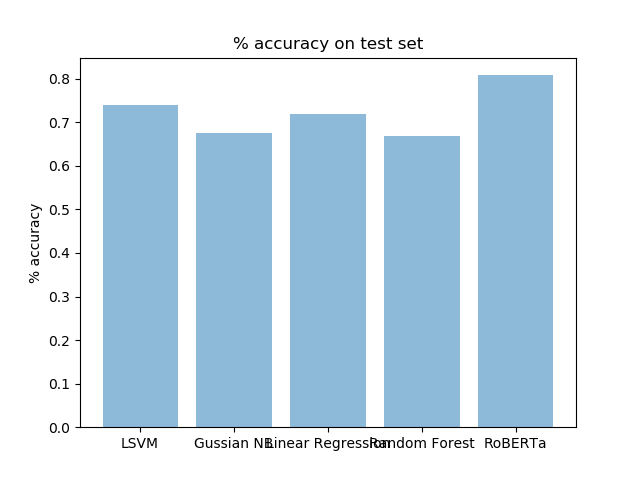


In order to more accurately measure model performance, the precision, recall and F1 scores of the respective models are calculated and shown on the second graph. The results yield a fairly similar estimation of model performance to that of accuracy above with RoBERTa the clear winner out of the model set. </br>


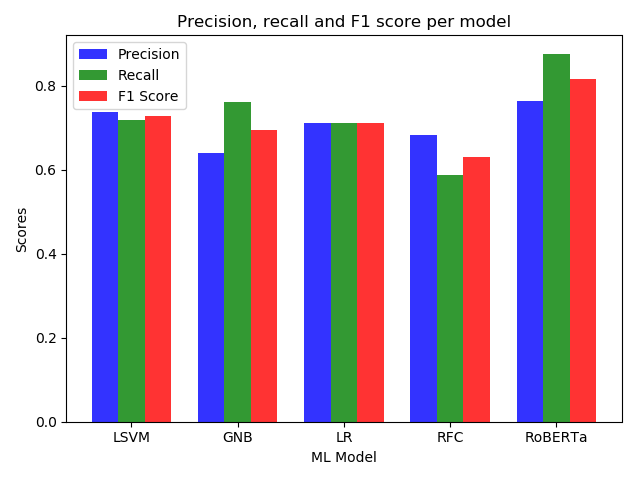

### Next Steps

Given that RoBERTa, the large pre-trained language model with transformer deep neural network architecture, is the most promising direction we will use the simpletransformers framework and try to improve the models performance over the following dimensions.

1. Hyperparameter optimization
2. Data preparation
3. Adding context
4. RoBERTa model selection

Focus will be given to the individual improvements along the above dimensions and then the possible combinations thereof in order to achieve the target base line F1 score for the competition.


No further work will be performed on the other models which will be used as baselines for the final project submission

### Expected Challenges/Issues

To date, all the models above have been tested in LiveDataLab on the project test set and have yielded a variety of results with no F1 score above the base line score 0.723 as yet. This contrasts of course to the F1 scores (notably for the RoBERTa model in particular) which appear to be higher on the training dataset split. Overfitting and a lack of good generationalisation appears to be a concern currently and part of our further investigation will be to potentially address this. </br>

Since we have chosen to focus on the RoBERTa model (and its possible variants), computational power and time to sufficiently train a neural network of this size and complexity is expected to present a challenge as we progress further. Various options such as the use of Google Colab and other cloud based solutions may need to be considered. </br>

## Detailed Code Appendix

### Import key python libraries for this project

The below cell imports all necessary key libraries used in this notebook first:

In [1]:
import os
#import json
import jsonlines
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support

#libraries for RoBERTa
from simpletransformers.classification import ClassificationModel,ClassificationArgs
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


### Importing of training and test data

The following code reads both the train and test JSON files and imports the data into a python dictionary format:

In [6]:
test_file = 'data/test.jsonl'
train_file = 'data/train.jsonl'

data_train = []
iter = 1
with jsonlines.open(train_file) as f:
    for line in f.iter():
        #data = json.load(line)
        #print(line) # or whatever else you'd like to do
        #print('processing training line: ' + str(iter))
        iter +=1
        data_train.append(line)
        #data = json.loads(line)
        #print(data)


data_test = []
iter = 1
with jsonlines.open(test_file) as f:
    for line in f.iter():
        #data = json.load(line)
        #print(line) # or whatever else you'd like to do
        #print('processing test line: ' + str(iter))
        iter +=1
        data_test.append(line)
        #data = json.loads(line)
        #print(data)
print("Count of training data entries:")
print(len(data_train))
print("Count of test data entries:")
print(len(data_test))

Count of training data entries:
5000
Count of test data entries:
1800


The following code converts the training and test data dictionaries into a Pandas DataFrame format for use later in the SKLearn ML models

In [8]:
train_data_pd = pd.DataFrame.from_dict(data_train)
test_data_pd = pd.DataFrame.from_dict(data_test)
print("Training and Test Datasets converted to Pandas DataFrames...")

Training and Test Datasets converted to Pandas DataFrames...


In this piece of code, I manually created a vocabulary list based on all words I could find in both the test and training data. This isn't really used later in the SKLearn models but thought it handy if we extended the models somehow or customised the vocabulary

In [9]:
##Create a vocabulary and transform JSON data in word vectors

vocabulary = []
vocabulary_size = 0

def build_vocabulary(data,vocab_size):
        for l in data:
            for w in (l['response'].strip().split(" ")):
                if w not in vocabulary:
                    #print(w)
                    vocabulary.append(w)
                    vocab_size = vocab_size + 1
        return(vocab_size)                    

vocabulary_size = build_vocabulary(data_train,vocabulary_size)
print('Vocabulary size after loading training data only:')
print(vocabulary_size)                    
print(len(vocabulary))
vocabulary_size = build_vocabulary(data_test,vocabulary_size)
print('Vocabulary size after loading training and test data:')
print(vocabulary_size)                    
print(len(vocabulary))

Vocabulary size after loading training data only:
16707
16707
Vocabulary size after loading training and test data:
20446
20446


In this piece of code we built a term document matrix (as per the MP3 assignment) to represent the raw Bag of Words vector format of the training and test data. 

In [9]:
##Construct the word/term vector matrix

def build_term_doc_matrix(data,vocab_size):
        """
        Construct the term-document matrix where each row represents a document, 
        and each column represents a vocabulary term.

        self.term_doc_matrix[i][j] is the count of term j in document i
        """

        term_doc_matrix = np.zeros([len(data), vocab_size])
        j_count = 0
        for j in vocabulary:
            i_count = 0
            for i in data:
                w_count = i['response'].count(j)
                term_doc_matrix[i_count,j_count]=w_count
                i_count += 1
            j_count += 1
        return(term_doc_matrix)
        
train_vector = build_term_doc_matrix(data_train,vocabulary_size)
print("Length of training vector TDM matrix:")
print(len(train_vector))
print("# of entries of training vector TDM matrix:")
print(train_vector.size)
        
test_vector = build_term_doc_matrix(data_test,vocabulary_size)
print("Length of test vector TDM matrix:")
print(len(test_vector))
print("# of entries of test vector TDM matrix:")
print(test_vector.size)        

Length of training vector TDM matrix:
5000
# of entries of training vector TDM matrix:
102230000
Length of test vector TDM matrix:
1800
# of entries of test vector TDM matrix:
36802800


Here we turn the labelled training data text format 'SARCASM' or 'NOT SARCASM' into a binary 1/0 list to for easier input into the models:

In [12]:
#Define the vector of actual results:
Actual_Results = []    
for  l in data_train:
    if l['label'] == 'SARCASM':
        Actual_Results.append(1)
    else:
        Actual_Results.append(0)

This code imports all the SKLearn model libraries required for the testing of the chosen ML models

In [10]:
## Import the various SKLearn ML models for testing:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

### Creation of TFIDF Word Vectors for training dataset

In this code, I take the training data and split it onto a features and labels seperate vectors. 

I then use the the TfidVectorizer() function from SKLearn to construct a TFIDF word vector representation of the training dataset. Note that I've set the max features (unique words) to 5000 here in the function while we can see our vocabulary is closer to 20,000 features. This might be worth playing with a bit later for incremental accuracy.

I use the 'features2' vector (in an array format) for the models input.



In [13]:
# getting training dataset features and labels
features = train_data_pd['response']
labels = train_data_pd['label']
labels = Actual_Results


# getting final test dataset features as well as 
features_final_test = test_data_pd['response']
id_final_test = test_data_pd['id']


## Stemming our data
#ps = PorterStemmer()
#features = features.apply(lambda x: x.split())
#features = features.apply(lambda x : ‘ ‘.join([ps.stem(word) for word in x]))


# vectorizing the data 
#from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
#tv = TfidfVectorizer()
#tv = TfidfVectorizer(max_features = 5000, vocabulary = vocabulary)
features2 = list(features)
features2 = tv.fit_transform(features2).toarray()
print("TFIDF Training dataset features vector succesfully created...")

#Turn the test dataset into the vectorized format as fitted to 'tv'
features_final_test2 = list(features_final_test)
features_final_test2 = tv.transform(features_final_test).toarray()
print("TFIDF Test dataset features vector succesfully created...")


TFIDF Training dataset features vector succesfully created...
TFIDF Test dataset features vector succesfully created...


### Splitting of training dataset randomly

The code below splits the features2 and labels datasets into a random training and test dataset (i.e. only usinfg the course project traiing data to train and test locally so far):

#### NOTE THAT RANDOM_STATE is set to zero to provide a fixed seed to the random generator for consistent results


In [16]:

# Splitting of training data into train and test data
features_train, features_test, labels_train, labels_test = train_test_split(features2, labels, test_size = .05, random_state = 0)
rawdata_train, rawdata_test, rawlabels_train, rawlabels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

print("Training dataset split into this many train samples:")
print(len(features_train))
print(len(rawdata_train))
print("Training dataset split into this many test/validation samples:")
print(len(features_test))
print("# of features:")
print(len(features_train[1,:]))

print("Final test dataset is this many samples:")
print(len(features_final_test2))
print("# of features:")
print(len(features_final_test2[1,:]))



Training dataset split into this many train samples:
4750
4750
Training dataset split into this many test/validation samples:
250
# of features:
5000
Final test dataset is this many samples:
1800
# of features:
5000


### Model 1: Linear SVM 

The below code implements the SKLearn implementation of LSVM and calculates a number of metrics including:
    
1. Accuracy on both train and test sets
2. The precision, recall and F1 score on the training data
3. The precision, recall and F1 score on the test data

In [34]:
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) # 96.04
print(lsvc.score(features_test, labels_test))   # 74.00
LSVM_train_acc= lsvc.score(features_train, labels_train)
LSVM_test_acc= lsvc.score(features_test, labels_test)

y_pred = lsvc.predict(features_train)
y_true = labels_train
LSVM_out_train = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(LSVM_out_train) #96.06


y_pred = lsvc.predict(features_test)
y_true = labels_test
LSVM_out_test = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(LSVM_out_test) #72.80



0.960421052631579
0.74
(0.9581764951902969, 0.9630096679277007, 0.960587002096436, None)
(0.7372881355932204, 0.71900826446281, 0.7280334728033473, None)


### Model 2: Guassian Naive Bayes 

The below code implements the SKLearn implementation of Guassian Naive Bayes and calculates a number of metrics including:
    
1. Accuracy on both train and test sets
2. The precision, recall and F1 score on the training data
3. The precision, recall and F1 score on the test data

In [35]:
# model 2:
# Using Gaussian Naive Bayes
gnb = GaussianNB()
# training the model
gnb.fit(features_train, labels_train)
# getting the score of train and test data
print(gnb.score(features_train, labels_train)) # 82.96
print(gnb.score(features_test, labels_test))   # 67.6
GNB_train_acc= gnb.score(features_train, labels_train)
GNB_test_acc= gnb.score(features_test, labels_test)

y_pred = gnb.predict(features_train)
y_true = labels_train
GNB_out_train = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(GNB_out_train) # 85.47


y_pred = gnb.predict(features_test)
y_true = labels_test
GNB_out_test = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(GNB_out_test) #69.43



0.8296842105263158
0.676
(0.7462358845671268, 1.0, 0.8546793605173344, None)
(0.6388888888888888, 0.7603305785123967, 0.6943396226415093, None)


### Model 2: Logistic Regression

The below code implements the SKLearn implementation of Logistic Regression and calculates a number of metrics including:
    
1. Accuracy on both train and test sets
2. The precision, recall and F1 score on the training data
3. The precision, recall and F1 score on the test data

In [36]:
# model 3:
# Using Logistic Regression
lr = LogisticRegression()
# training the model
lr.fit(features_train, labels_train)
# getting the score of train and test data
print(lr.score(features_train, labels_train)) # 85.85
print(lr.score(features_test, labels_test))   # 72.00
LR_train_acc= lr.score(features_train, labels_train)
LR_test_acc= lr.score(features_test, labels_test)

y_pred = lr.predict(features_train)
y_true = labels_train
LR_out_train = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(LR_out_train) # 86.15


y_pred = lr.predict(features_test)
y_true = labels_test
LR_out_test = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(LR_out_test) # 71.07


C:\Users\User-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8585263157894737
0.72
(0.8448484848484848, 0.8789407313997478, 0.8615574783683561, None)
(0.7107438016528925, 0.7107438016528925, 0.7107438016528925, None)


### Model 4: Random Forest Classifier

The below code implements the SKLearn implementation of Random Forest Classifier and calculates a number of metrics including:
    
1. Accuracy on both train and test sets
2. The precision, recall and F1 score on the training data
3. The precision, recall and F1 score on the test data

In [37]:
# model 4:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
# training the model
rfc.fit(features_train, labels_train)
# getting the score of train and test data
print(rfc.score(features_train, labels_train)) # 99.09
print(rfc.score(features_test, labels_test))   # 66.8
RFC_train_acc= rfc.score(features_train, labels_train)
RFC_test_acc= rfc.score(features_test, labels_test)

y_pred = rfc.predict(features_train)
y_true = labels_train
RFC_out_train = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(RFC_out_train) # 99.09


y_pred = rfc.predict(features_test)
y_true = labels_test
RFC_out_test = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(RFC_out_test) # 63.11


0.9909473684210526
0.668
(0.9944961896697714, 0.987389659520807, 0.9909301835055896, None)
(0.6826923076923077, 0.5867768595041323, 0.6311111111111112, None)


### Model 5: RoBERTa

The below code implements the SimpleTransformers.ai implementation of RoBERTa and calculates a number of metrics including:
    
1. Accuracy on both train and test sets
2. The precision, recall and F1 score on the training data
3. The precision, recall and F1 score on the test data

In [18]:
from simpletransformers.classification import ClassificationModel,ClassificationArgs

In [19]:
train_df = pd.DataFrame({
    'text': rawdata_train.str.replace('@USER', '', regex=False).str.strip(),
    'labels': rawlabels_train
})
#rawdata_train, rawdata_test, rawlabels_train, rawlabels_test

In [27]:
test_df = pd.DataFrame({
    'text': rawdata_test.str.replace('@USER', '', regex=False).str.strip(),
    'labels': rawlabels_test
})

In [22]:
# Create a ClassificationModel
# for training from scratch
model = ClassificationModel('roberta', 'roberta-base', use_cuda=False) # You can set class weights by using the optional weight argument
# for loading my pre-trained model
#model = ClassificationModel('roberta', 'outputs/checkpoint-594-epoch-1', use_cuda=False)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [23]:
#model_args = ClassificationArgs()
#model_args.reprocess_input_data = True
#model_args.overwrite_output_dir = True

model_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True
}

# Train the model
model.train_model(train_df,args=model_args)

C:\Users\User-PC\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(594, 0.539390764095717)

In [24]:
# Evaluate the model - training 
result_train, model_outputs_train, wrong_predictions_train = model.eval_model(train_df, 
                                                            f1=f1_score,
                                                            acc=accuracy_score,
                                                            prec= precision_score,
                                                            rec= recall_score)


In [26]:
result_train

{'mcc': 0.7212081013757768,
 'tp': 2116,
 'tn': 1969,
 'fp': 402,
 'fn': 263,
 'f1': 0.8642025730038799,
 'acc': 0.86,
 'prec': 0.840349483717236,
 'rec': 0.8894493484657419,
 'eval_loss': 0.325839846517251}

In [40]:
roberta_train_result=result_train
roberta_train_result['acc']

0.8397894736842105

In [28]:
# Evaluate the model - training 
result_test, model_outputs_test, wrong_predictions_test = model.eval_model(test_df, 
                                                            f1=f1_score,
                                                            acc=accuracy_score,
                                                            prec= precision_score,
                                                            rec= recall_score)


In [29]:
roberta_test_result=result_test
roberta_test_result['acc']
result_test

{'mcc': 0.6238264579949548,
 'tp': 106,
 'tn': 96,
 'fp': 33,
 'fn': 15,
 'f1': 0.8153846153846155,
 'acc': 0.808,
 'prec': 0.762589928057554,
 'rec': 0.8760330578512396,
 'eval_loss': 0.4293329161591828}

### Performing predictions on project test data for LiveDataLab

Perform predictions on the project test data for the competition for upload to LiveDataLab for grading

In [38]:
#Writing the LSVM predictions to the output file: LSVM_answers.txt
y_pred = lsvc.predict(features_final_test2)
f = open("LSVM_answers.txt", "w")
for i in range(len(id_final_test)):
    i_result = y_pred[i]
    pred_id = id_final_test[i]
    if i_result == 1:
        f.write(pred_id + ',' + "SARCASM" +"\n")
    else:
        f.write(pred_id + ',' + "NOT_SARCASM" +"\n")
f.close()


#Writing the Guassian NB predictions to the output file: GNB_answers.txt
y_pred = gnb.predict(features_final_test2)
f = open("GNB_answers.txt", "w")
for i in range(len(id_final_test)):
    i_result = y_pred[i]
    pred_id = id_final_test[i]
    if i_result == 1:
        f.write(pred_id + ',' + "SARCASM" +"\n")
    else:
        f.write(pred_id + ',' + "NOT_SARCASM" +"\n")
f.close()


#Writing the Linear Regression predictions to the output file: LR_answers.txt
y_pred = lr.predict(features_final_test2)
f = open("LR_answers.txt", "w")
for i in range(len(id_final_test)):
    i_result = y_pred[i]
    pred_id = id_final_test[i]
    if i_result == 1:
        f.write(pred_id + ',' + "SARCASM" +"\n")
    else:
        f.write(pred_id + ',' + "NOT_SARCASM" +"\n")
f.close()


#Writing the Random Forest Classifier predictions to the output file: RFC_answers.txt
y_pred = rfc.predict(features_final_test2)
f = open("RFC_answers.txt", "w")
for i in range(len(id_final_test)):
    i_result = y_pred[i]
    pred_id = id_final_test[i]
    if i_result == 1:
        f.write(pred_id + ',' + "SARCASM" +"\n")
    else:
        f.write(pred_id + ',' + "NOT_SARCASM" +"\n")
f.close()



### Comparison of baseline models

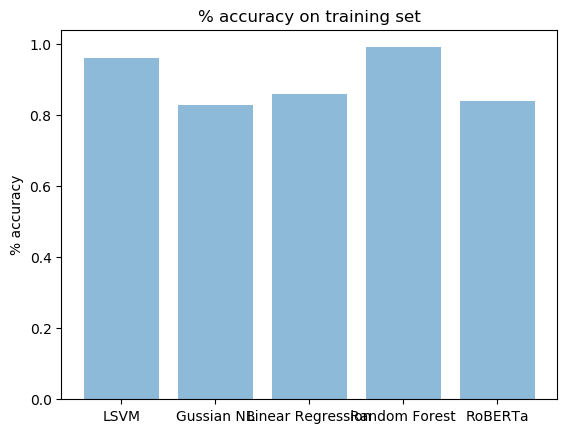

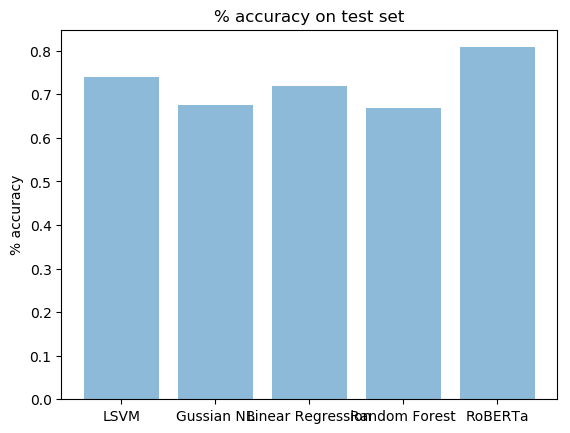

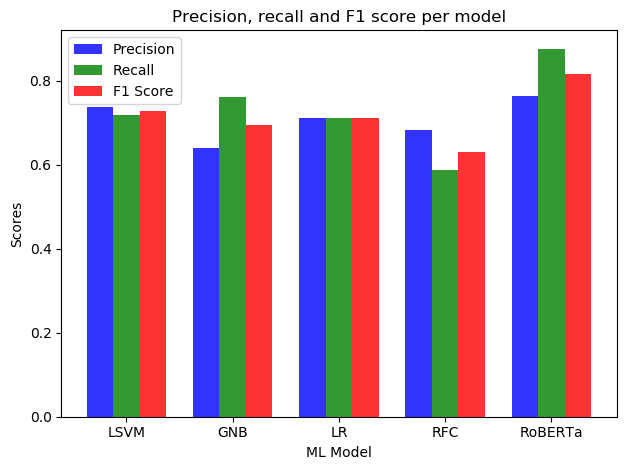

In [41]:
import matplotlib.pyplot as plt; plt.rcdefaults()
#import numpy as np
import matplotlib.pyplot as plt


#Plot accuracy on training set for each model
objects = ('LSVM', 'Gussian NB', 'Linear Regression', 'Random Forest','RoBERTa')
y_pos = np.arange(len(objects))
performance = [LSVM_train_acc,GNB_train_acc,LR_train_acc,RFC_train_acc,roberta_train_result['acc']]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% accuracy')
plt.title('% accuracy on training set')

plt.show()

#Plot accuracy on test set for each model
objects = ('LSVM', 'Gussian NB', 'Linear Regression', 'Random Forest','RoBERTa')
y_pos = np.arange(len(objects))
performance = [LSVM_test_acc,GNB_test_acc,LR_test_acc,RFC_test_acc,roberta_test_result['acc']]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% accuracy')
plt.title('% accuracy on test set')


plt.savefig('acc_test.png')
plt.show()
# Plot the precision, recall and F1 score on the test
n_groups = 5
Prec_data = (LSVM_out_test[0],GNB_out_test[0],LR_out_test[0],RFC_out_test[0],roberta_test_result['prec'])
Rec_data = (LSVM_out_test[1],GNB_out_test[1],LR_out_test[1],RFC_out_test[1],roberta_test_result['rec'])
F1_data = (LSVM_out_test[2],GNB_out_test[2],LR_out_test[2],RFC_out_test[2],roberta_test_result['f1'])
#GNB_data = (GNB_out_test(1:3))
#LR_data = (LR_out_test(1:3))
#RFC_data = (RFC_out_test(1:3))

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, Prec_data, bar_width,
alpha=opacity,
color='b',
label='Precision')

rects2 = plt.bar(index + bar_width, Rec_data, bar_width,
alpha=opacity,
color='g',
label='Recall')

rects3 = plt.bar(index + 2*bar_width, F1_data, bar_width,
alpha=opacity,
color='r',
label='F1 Score')

plt.xlabel('ML Model')
plt.ylabel('Scores')
plt.title('Precision, recall and F1 score per model')
plt.xticks(index + bar_width, ('LSVM', 'GNB', 'LR', 'RFC','RoBERTa'))
plt.legend()

plt.tight_layout()
plt.savefig('pr_rec_f1.png')
plt.show()

